In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
from scipy.special import gamma

In [2]:
from mpmath import mp
mp.dps = 100

In [3]:
def cost(nu, mu_p, mu_q, t):    
    num = (nu * mu_p**2)**(mu_p * t) * (nu * mu_q**2)**(mu_q * t)
    det = gamma(mu_p * t) * gamma(mu_q * t)    
    return num/det

def integrand(y, x, nu, mu_p, mu_q, t):
    temp1 = y**(mu_p * t - 1) * (y-x)**(mu_q * t - 1)
    temp2 = np.exp(-nu * (mu_q**2 * (y-x) + mu_p**2 * y))  
    return temp1 * temp2

def pdf(x, nu, mu_p, mu_q, t):
    if x>=0:
        ys = np.linspace(x+0.001,100,1000)
    if x<0:
        ys = np.linspace(0.001,100,1000)
    return np.trapz(integrand(ys, x, nu, mu_p, mu_q, t),ys)*cost(nu, mu_p, mu_q, t)

In [4]:
x = 1
nu = 1
mu_q = 1
mu_p = 2
t = 1

pdf(x, nu, mu_p, mu_q, t)

0.07099333284490163

In [5]:
xs = np.linspace(-100,100,10000)
pdfs = []
for x in xs:
    pdfs.append(pdf(x, nu, mu_p, mu_q, t))

np.trapz(pdfs,xs)

0.9867787218043315

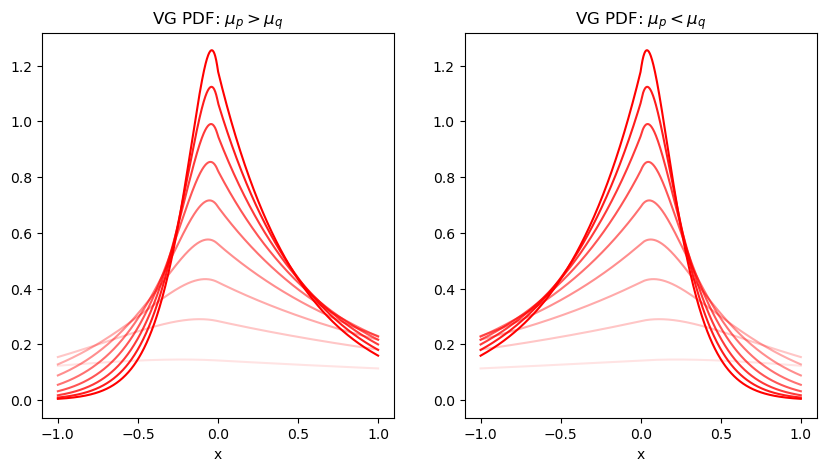

In [6]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
xs = np.linspace(-1,1,1000)
nus = np.linspace(0.001,2,10)
pdfs = []

mu_q = 1
mu_p = 2

for nu in nus:
    for x in xs:
        pdfs.append(pdf(x, nu, mu_q, mu_p, t))
    ax[0].plot(xs,pdfs, c='r', alpha = nu/2)
    pdfs = []
ax[0].set_title('VG PDF: $\mu_{p}>\mu_{q}$')
ax[0].set_xlabel('x')

mu_q = 2
mu_p = 1

for nu in nus:
    for x in xs:
        pdfs.append(pdf(x, nu, mu_q, mu_p, t))
    ax[1].plot(xs,pdfs, c='r', alpha = nu/2)
    pdfs = []
ax[1].set_title('VG PDF: $\mu_{p}<\mu_{q}$')
ax[1].set_xlabel('x')

plt.show()